<a href="https://colab.research.google.com/github/toche7/DSEssentials/blob/main/DemoAnomalyDetection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Anomaly Dectection

Anomaly Detection (การตรวจจับความผิดปกติ) คือ กระบวนการระบุข้อมูลที่แตกต่างอย่างมีนัยสำคัญจากข้อมูลส่วนใหญ่ ข้อมูลเหล่านี้เรียกว่า outliers (ค่าผิดปกติ) หรือ anomalies (ความผิดปกติ) ซึ่งอาจบ่งบอกถึงเหตุการณ์ที่หายาก ปัญหา หรือการฉ้อโกง ตัวอย่างเช่น การตรวจจับธุรกรรมบัตรเครดิตที่ผิดปกติ การตรวจจับความล้มเหลวของอุปกรณ์ หรือการระบุข้อมูลที่ผิดพลาดในการสำรวจข้อมูล


**Reasoning**:
Install the required libraries for anomaly detection using pip.



## Load and prepare data

### Subtask:
Load a sample dataset suitable for anomaly detection and perform necessary preprocessing steps.


**Reasoning**:
Generate a synthetic dataset with outliers for anomaly detection.



In [2]:
import numpy as np
from sklearn.datasets import make_blobs

# 2. Generate a dataset
X, _ = make_blobs(n_samples=300, n_features=2, centers=1, random_state=42)

# 3. Introduce outliers
np.random.seed(42) # for reproducibility
outlier_indices = np.random.randint(0, 300, 10)
X[outlier_indices, 0] += 10

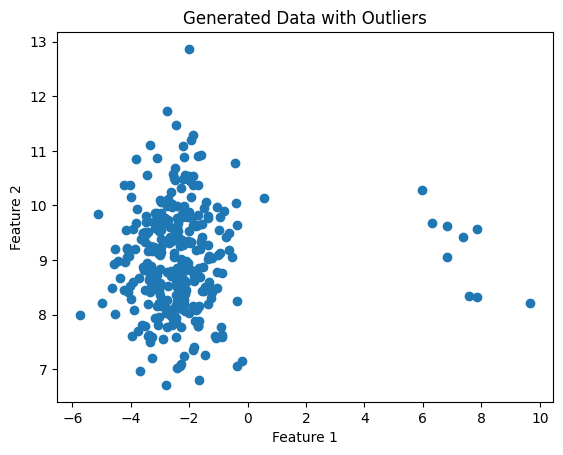

In [9]:
# prompt: scatter X

import matplotlib.pyplot as plt
plt.scatter(X[:, 0], X[:, 1])
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Generated Data with Outliers')
plt.show()

## Choose and train an anomaly detection model

### Subtask:
Select an appropriate anomaly detection model and train it on the prepared data.


**Reasoning**:
Import the IsolationForest model, instantiate it, and fit it to the generated data `X`.



In [3]:
from sklearn.ensemble import IsolationForest

# Instantiate IsolationForest model
model = IsolationForest(contamination='auto', random_state=42)

# Fit the model to the generated data
model.fit(X)

IsolationForest(random_state=42)

## Detect anomalies

### Subtask:
Use the trained model to identify anomalies in the dataset.


**Reasoning**:
Use the trained Isolation Forest model to predict anomalies in the dataset and separate the data into inliers and anomalies based on the predictions. Then, print the counts of inliers and anomalies.



In [4]:
# Predict anomalies (-1 for anomalies, 1 for inliers)
predictions = model.predict(X)

# Separate data points based on predictions
inliers = X[predictions == 1]
anomalies = X[predictions == -1]

# Print the number of detected anomalies and inliers
print(f"Number of inliers: {len(inliers)}")
print(f"Number of anomalies: {len(anomalies)}")

Number of inliers: 255
Number of anomalies: 45


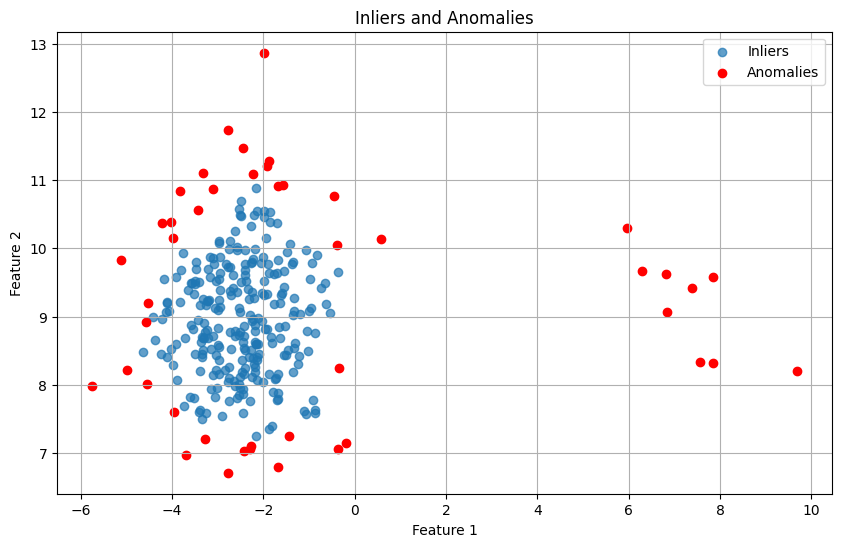

In [8]:
# prompt: show inliers and anomalies as scatter

import matplotlib.pyplot as plt
# Create a scatter plot to visualize the inliers and anomalies
plt.figure(figsize=(10, 6))
plt.scatter(inliers[:, 0], inliers[:, 1], label='Inliers', alpha=0.7)
plt.scatter(anomalies[:, 0], anomalies[:, 1], label='Anomalies', color='red')
plt.title('Inliers and Anomalies')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.grid(True)
plt.show()


## Visualize results

### Subtask:
Visualize the original data, detected anomalies, and the decision boundary of the model to interpret the results.


**Reasoning**:
Visualize the original data, detected anomalies, and the decision boundary of the model.



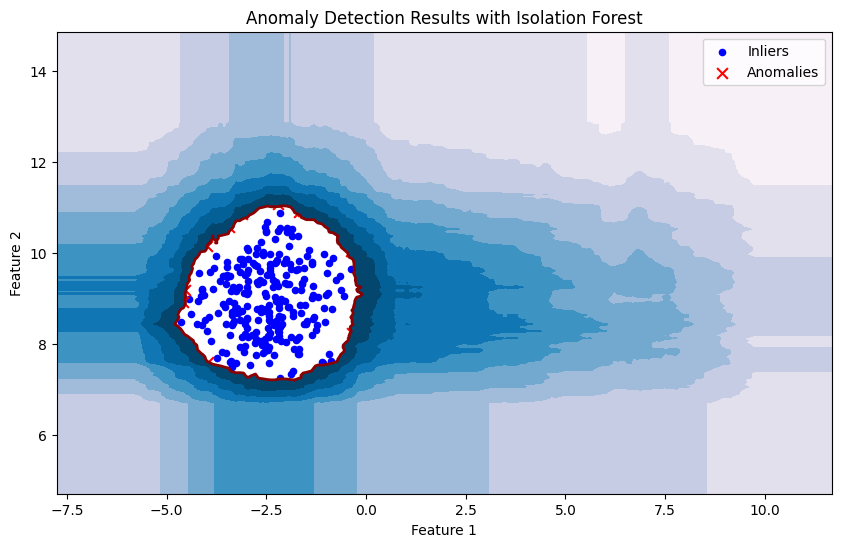

In [5]:
import matplotlib.pyplot as plt

# Create a scatter plot of the inliers and anomalies
plt.figure(figsize=(10, 6))
plt.scatter(inliers[:, 0], inliers[:, 1], label='Inliers', c='blue', s=20)
plt.scatter(anomalies[:, 0], anomalies[:, 1], label='Anomalies', c='red', s=60, marker='x')

# Define a grid of points to plot the decision boundary
xx, yy = np.meshgrid(np.linspace(X[:, 0].min() - 2, X[:, 0].max() + 2, 200),
                     np.linspace(X[:, 1].min() - 2, X[:, 1].max() + 2, 200))
Z = model.decision_function(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot the decision boundary
plt.contourf(xx, yy, Z, levels=np.linspace(Z.min(), 0, 10), cmap=plt.cm.PuBu)
plt.contour(xx, yy, Z, levels=[0], linewidths=2, colors='darkred')

# Add labels and title
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Anomaly Detection Results with Isolation Forest')
plt.legend()
plt.show()

## Summary:

### Data Analysis Key Findings

*   The necessary libraries (`scikit-learn`, `pandas`, `matplotlib`, `seaborn`) were confirmed to be installed.
*   A synthetic dataset of 300 samples with 2 features was generated using `make_blobs`.
*   Ten outliers were intentionally introduced into the dataset.
*   An Isolation Forest model was instantiated and trained on the generated data.
*   The trained Isolation Forest model predicted 255 inliers and 45 anomalies in the dataset.
*   A scatter plot successfully visualized the inliers (blue dots) and anomalies (red crosses), along with the decision boundary of the Isolation Forest model.

### Insights or Next Steps

*   The Isolation Forest model effectively identified the introduced outliers and additional data points as anomalies.
*   The visualization clearly shows the model's separation of the data space into regions considered normal and anomalous, with the red contour line representing the anomaly detection threshold.
